In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests, json, pycountry, datetime
from matplotlib import style

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500).tolist()
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500).tolist()
lat_lngs = zip(lats, lngs)

In [3]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Capitalize city names
cities = [city.title() for city in cities]

len(cities)

599

## Perform API Calls

In [4]:
# Starting URL for Weather Map API Call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key


# Create empty lists
windspeed = []
tempmax = []
humidity = []
latitude = []
longitude = []
date = []
cloudiness = []
citynames = []
countrynames = []

print("Beginning Data Retrieval")
print("-----------------------------")

count = 1
setnum = 1

# Request 
for cityname in cities:
    url = base_url + "&q=" + cityname
    respond = requests.get(url)
   
    response = respond.json()
    
    print(f"Processing Record {count} of Set {setnum} | {cityname}")
    count += 1
  
    try: 
        windspeed.append(response["wind"]["speed"])
        humidity.append(response["main"]["humidity"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        date.append(response["dt"])
        cloudiness.append(response["clouds"]["all"])
        tempmax.append(response["main"]["temp_max"])
        
        citynames.append(cityname)
        country = pycountry.countries.get(alpha_2=response["sys"]["country"])
        countrynames.append(country.name)
        print(respond.url)
        
    except KeyError:
        print("**KeyError: City not found. Skip to next city**")  
    
    if count % 51 == 0:
        count = 1
        setnum += 1

# If the list doesn't have 500 cities, create latitudes and longitudes until there is 500 cities
if len(citynames) <= 500:
    while len(citynames) <= 500:
        lat = np.random.uniform(low=-90.000, high=90.000)
        lng = np.random.uniform(low=-180.000, high=180.000)
        
        city = citipy.nearest_city(lat, lat).city_name.title()
        if city not in cities:
            url = base_url + "&q=" + city
            respond = requests.get(url)
   
            response = respond.json()
    
            print(f"Processing Record {count} of Set {setnum} | {cityname}")
            count += 1
  
            try: 
                windspeed.append(response["wind"]["speed"])
                humidity.append(response["main"]["humidity"])
                latitude.append(response["coord"]["lat"])
                longitude.append(response["coord"]["lon"])
                date.append(response["dt"])
                cloudiness.append(response["clouds"]["all"])
                tempmax.append(response["main"]["temp_max"])
        
                citynames.append(city)
                country = pycountry.countries.get(alpha_2=response["sys"]["country"])
                countrynames.append(country.name)
                print(respond.url)
        
            except KeyError:
                print("**KeyError: City not found. Skip to next city**") 
            except:
                print("**General Error: Skip to next city**")
    
            if count % 51 == 0:
                count = 1
                setnum += 1

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Georgetown
Processing Record 2 of Set 1 | Tsihombe
**KeyError: City not found. Skip to next city**
Processing Record 3 of Set 1 | Mahebourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Mahebourg
Processing Record 4 of Set 1 | Dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Dikson
Processing Record 5 of Set 1 | Bengkulu
**KeyError: City not found. Skip to next city**
Processing Record 6 of Set 1 | Gorontalo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Gorontalo
Processing Record 7 of Set 1 | Talnakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Talnakh
Process

Processing Record 7 of Set 2 | Berdigestyakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Berdigestyakh
Processing Record 8 of Set 2 | San Cristobal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=San%20Cristobal
Processing Record 9 of Set 2 | Qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Qaanaaq
Processing Record 10 of Set 2 | Hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Hasaki
Processing Record 11 of Set 2 | Samusu
**KeyError: City not found. Skip to next city**
Processing Record 12 of Set 2 | Nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Nikolskoye
Processing Record 13 of Set 2 | Tabiauea
**KeyError: City not found. Skip to next city**
Processing Record 14 of Set 2 | Maniitsoq


Processing Record 15 of Set 3 | Nanakuli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Nanakuli
Processing Record 16 of Set 3 | Antofagasta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Antofagasta
Processing Record 17 of Set 3 | Chifeng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Chifeng
Processing Record 18 of Set 3 | Cherskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Cherskiy
Processing Record 19 of Set 3 | Skjervoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Skjervoy
Processing Record 20 of Set 3 | Beisfjord
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Beisfjord
Processing Record 21 of Set 3 | Kaitangata
http://api.openweathermap.org/dat

Processing Record 20 of Set 4 | Shenjiamen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Shenjiamen
Processing Record 21 of Set 4 | Butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Butaritari
Processing Record 22 of Set 4 | Torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Torbay
Processing Record 23 of Set 4 | Khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Khatanga
Processing Record 24 of Set 4 | Soldotna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Soldotna
Processing Record 25 of Set 4 | Nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Nanortalik
Processing Record 26 of Set 4 | Talcahuano
http://api.openweathermap.org/d

Processing Record 26 of Set 5 | Bocaranga
**KeyError: City not found. Skip to next city**
Processing Record 27 of Set 5 | Castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Castro
Processing Record 28 of Set 5 | Upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Upernavik
Processing Record 29 of Set 5 | Bandarbeyla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Bandarbeyla
Processing Record 30 of Set 5 | Oranjestad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Oranjestad
Processing Record 31 of Set 5 | Salalah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Salalah
Processing Record 32 of Set 5 | Meulaboh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554

Processing Record 34 of Set 6 | Pangnirtung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Pangnirtung
Processing Record 35 of Set 6 | Saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Saldanha
Processing Record 36 of Set 6 | Arraial Do Cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Arraial%20Do%20Cabo
Processing Record 37 of Set 6 | Lahaina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Lahaina
Processing Record 38 of Set 6 | Inhambane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Inhambane
Processing Record 39 of Set 6 | Cascais
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Cascais
Processing Record 40 of Set 6 | Tullamore
http://api.openwea

Processing Record 41 of Set 7 | Necochea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Necochea
Processing Record 42 of Set 7 | Aklavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Aklavik
Processing Record 43 of Set 7 | Parnarama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Parnarama
Processing Record 44 of Set 7 | Tazovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Tazovskiy
Processing Record 45 of Set 7 | Prince Rupert
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Prince%20Rupert
Processing Record 46 of Set 7 | Gimli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Gimli
Processing Record 47 of Set 7 | Bereda
http://api.openweathermap.org/data/

Processing Record 49 of Set 8 | Sisimiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Sisimiut
Processing Record 50 of Set 8 | Santa Maria Da Boa Vista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Santa%20Maria%20Da%20Boa%20Vista
Processing Record 1 of Set 9 | Chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Chokurdakh
Processing Record 2 of Set 9 | Te Anau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Te%20Anau
Processing Record 3 of Set 9 | Maldonado
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Maldonado
Processing Record 4 of Set 9 | Umm Lajj
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Umm%20Lajj
Processing Record 5 of Set 9 | Lumbert

Processing Record 4 of Set 10 | Taoudenni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Taoudenni
Processing Record 5 of Set 10 | Caxito
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Caxito
Processing Record 6 of Set 10 | Rivera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Rivera
Processing Record 7 of Set 10 | Tumut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Tumut
Processing Record 8 of Set 10 | Pundaguitan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Pundaguitan
Processing Record 9 of Set 10 | Kazalinsk
**KeyError: City not found. Skip to next city**
Processing Record 10 of Set 10 | Kpandae
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Kpandae

Processing Record 11 of Set 11 | Dodge City
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Dodge%20City
Processing Record 12 of Set 11 | Pacific Grove
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Pacific%20Grove
Processing Record 13 of Set 11 | Litovko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Litovko
Processing Record 14 of Set 11 | Xining
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Xining
Processing Record 15 of Set 11 | Preobrazheniye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Preobrazheniye
Processing Record 16 of Set 11 | Caririacu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Caririacu
Processing Record 17 of Set 11 | Yatou
http://api.

Processing Record 19 of Set 12 | Salamiyah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Salamiyah
Processing Record 20 of Set 12 | Atar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Atar
Processing Record 21 of Set 12 | Amapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Amapa
Processing Record 22 of Set 12 | College
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=College
Processing Record 23 of Set 12 | Vila Velha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Vila%20Velha
Processing Record 24 of Set 12 | Saint-Georges
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Saint-Georges
Processing Record 25 of Set 12 | Innisfail
http://api.openweathermap.org/d

In [5]:
cities_df = pd.DataFrame({"City":citynames, "Country":countrynames, "Lat":latitude,"Lng": longitude, 
                          "Date":date, "Max Temp":tempmax,"Humidity":humidity, "Wind Speed":windspeed, 
                          "Cloudiness":cloudiness})

cities_df.count()

City          535
Country       535
Lat           535
Lng           535
Date          535
Max Temp      535
Humidity      535
Wind Speed    535
Cloudiness    535
dtype: int64

In [6]:
cities_df.to_csv(output_data_file, index=False, header=True)
cities_df.head()

,City,Country,Lat,Lng,Date,Max Temp,Humidity,Wind Speed,Cloudiness
0,Georgetown,Guyana,6.80,-58.16,1531000040,82.03,84,3.71,48
1,Mahebourg,Mauritius,-20.41,57.70,1530997200,69.80,83,2.24,40
2,Dikson,Russian Federation,73.51,80.55,1531000081,40.45,94,18.14,32
3,Gorontalo,Indonesia,0.54,123.06,1531000081,73.75,91,4.16,24
4,Talnakh,Russian Federation,69.49,88.39,1531000081,51.25,58,5.39,76


In [7]:
date = max(cities_df["Date"])

converted_date = datetime.datetime.fromtimestamp(date).strftime('%m/%d/%Y')

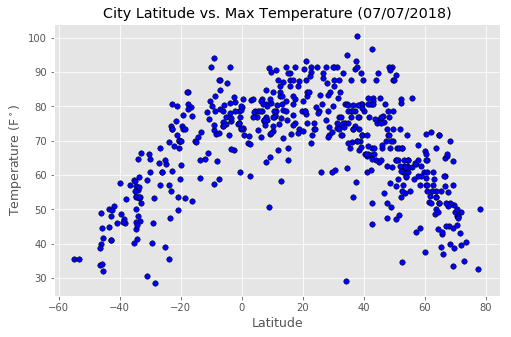

In [8]:
style.use('ggplot')

plt.figure(figsize=(8, 5))
plt.scatter(latitude, tempmax, s = 30, color = "blue", edgecolors='black')

plt.xlabel("Latitude", size = 12.5)
plt.ylabel("Temperature (F$^\circ$)", size = 12.5)
plt.title(f"City Latitude vs. Max Temperature ({converted_date})")
plt.savefig("images/Latitude_Temp.png")
plt.show()

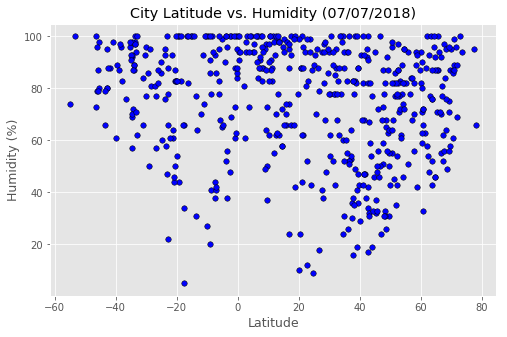

In [9]:
plt.figure(figsize=(8, 5))
plt.scatter(latitude, humidity, s = 30, color = "blue", edgecolors='black')

plt.xlabel("Latitude", size = 12.5)
plt.ylabel("Humidity (%)", size = 12.5)
plt.title(f"City Latitude vs. Humidity ({converted_date})")
plt.savefig("images/Latitude_Humidity.png")
plt.show()

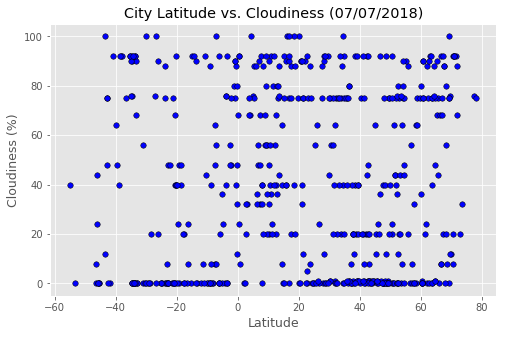

In [10]:
plt.figure(figsize=(8, 5))
plt.scatter(latitude, cloudiness, s = 30, color = "blue", edgecolors='black')

plt.xlabel("Latitude", size = 12.5)
plt.ylabel("Cloudiness (%)", size = 12.5)
plt.title(f"City Latitude vs. Cloudiness ({converted_date})")
plt.savefig("images/Latitude_Cloudiness.png")
plt.show()

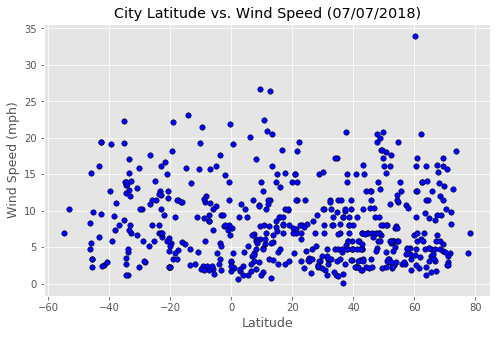

In [11]:
plt.figure(figsize=(8, 5))
plt.scatter(latitude, windspeed, s = 30, color = "blue", edgecolors='black')

plt.xlabel("Latitude", size = 12.5)
plt.ylabel("Wind Speed (mph)", size = 12.5)
plt.title(f"City Latitude vs. Wind Speed ({converted_date})")
plt.savefig("images/Latitude_Windspeed.png")
plt.show()